In [82]:
import numpy as np
import matplotlib.pyplot as plt 
import importlib

import time

# import animation module here
import matplotlib.animation as animation
from IPython.display import HTML, clear_output as clr

In [83]:
import env as Environments
import agent as Agents
importlib.reload(Environments)
importlib.reload(Agents)

<module 'agent' from 'C:\\Users\\kumarabh\\Downloads\\Work\\Experiments\\Hypotheton\\src\\evolution\\simple_experiment_v01\\agent.py'>

In [84]:
random_dna = [format(np.random.randint(0, 16**8, dtype=np.int64) , '08x') for _ in range(4)]
agent = Agents.Agent(1, random_dna)
print("sample_dna:", agent.dna)
# sample input

input_keys = ["Slr", "Sfd", "Sg", "Age", "Rnd", "Blr", "Osc", "Bfd", "Plr", "Pop", "Pfd", "LPf", "LMy", "LBf", "LMx", "BDy", "Gen", "BDx", "Lx", "BD", "Ly"]
sample_input = {key: np.random.rand() for key in input_keys}
print("sample_input:", sample_input)

# sample output
sample_output = agent.get_outputs(sample_input)
print("sample_output:", sample_output)

sample_dna: ['1499f53e', 'c0f29f5d', '58927b92', 'e3d8c090']
sample_input: {'Slr': 0.09116267385536003, 'Sfd': 0.7875179839184708, 'Sg': 0.24397213375440774, 'Age': 0.761139662894908, 'Rnd': 0.09569539535613314, 'Blr': 0.5445376087226843, 'Osc': 0.9129266901991777, 'Bfd': 0.05866196814103186, 'Plr': 0.9877876097293726, 'Pop': 0.6855171045080743, 'Pfd': 0.9266615760405438, 'LPf': 0.5723349540930441, 'LMy': 0.3974173076498638, 'LBf': 0.1487141328810978, 'LMx': 0.876317722183043, 'BDy': 0.9144599289996146, 'Gen': 0.3637262091637631, 'BDx': 0.86986344059776, 'Lx': 0.10240888401158132, 'BD': 0.3772508137819002, 'Ly': 0.9569530752462512}
sample_output: {'LPD': 0.04192322458238862, 'Kill': 0.7535471483488154, 'OSC': 0.31220916648473995, 'SG': 0.8321595928337153, 'Res': 0.8503131427535633, 'Mfd': 0.7536691101598061, 'Mrn': 0.2416443932387763, 'Mrv': 0.07654930556510597, 'MRL': 0.8664231490104157, 'MX': 0.6211398776532666, 'MY': 0.407555516700257}


In [85]:
import pickle
def save_generations(env, image_list, suffix = ''):
    agents = [agent.dna for agent in env.agents]
    generations = env.generation_count
    images = image_list

    pickle.dump(agents, open("saves/agents"+suffix+".pkl", "wb"))
    pickle.dump(generations, open("saves/generations"+suffix+".pkl", "wb"))
    pickle.dump(images, open("saves/images"+suffix+".pkl", "wb"))

def load_generations(suffix = ''):
    agents = pickle.load(open("saves/agents"+suffix+".pkl", "rb"))
    generations = pickle.load(open("saves/generations"+suffix+".pkl", "rb"))
    images = pickle.load(open("saves/images"+suffix+".pkl", "rb"))
    return agents, generations, images

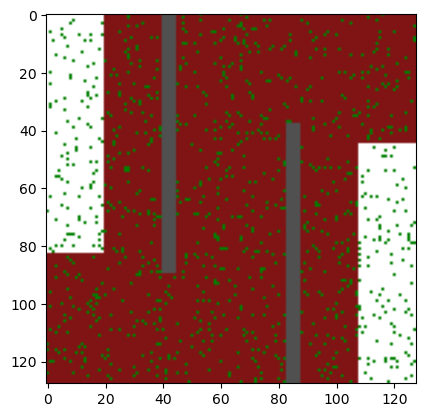

In [86]:
# sample run evolution environment
env = Environments.SimpleEvolutionEnv(max_steps_per_generation=200, population=1000, number_hidden_neurons = 4, gene_length = 16)
plt.imshow(env.render())
plt.show()
# agents_dna, generations, images = load_generations(suffix='_a')
# env.dna_bank = agents_dna
# env.generation_count = generations
# image_list = [img for img in images]
image_list = []

In [89]:
state_time_lapses = []
action_time_lapses = []
t0 = time.time()
output_keys = env.agents[0].output_index.keys()
for gen in range(1):
    print("Generation:", gen)
    print("average time per step: states {}, actions {}".format(np.mean(state_time_lapses), np.mean(action_time_lapses)))
    print("Survival_rate:", env.survival_rate)
    print("total time:", time.time() - t0)
    time_lapses = []
    generation_images = []
    # lets time each step
    done = False
    max_step = 201
    t0 = time.time()
    steps = 0
    states = env.reset(keep_old_agents = env.generation_count + gen > 0)
    while not done and steps < max_step:
        img = env.render()
        start = time.time()
        sample_actions = [env.agents[k].get_outputs(states[k]) for k in range(env.population)]
        # sample_actions = [{key: np.random.rand() for key in output_keys} for k in range(env.population)]
        action_time_lapses.append(time.time() - start)
        start = time.time()
        states, _, done, _ = env.step(sample_actions)
        state_time_lapses.append(time.time() - start)
        start = time.time()
        generation_images.append(img)
        steps += 1

    clr(wait=True)
    image_list.append(generation_images)

Generation: 0
average time per step: states nan, actions nan
Survival_rate: 0
total time: 0.004972696304321289
Step: 0 Count agents 1000 population 1000 killings 0
Step: 10 Count agents 1000 population 1000 killings 0
Step: 20 Count agents 1000 population 1000 killings 0
Step: 30 Count agents 1000 population 1000 killings 0
Step: 40 Count agents 1000 population 1000 killings 0
Step: 50 Count agents 1000 population 1000 killings 0
Step: 60 Count agents 1000 population 1000 killings 0
Step: 70 Count agents 1000 population 1000 killings 0
Step: 80 Count agents 1000 population 1000 killings 0
Step: 90 Count agents 1000 population 1000 killings 0
Step: 100 Count agents 1000 population 1000 killings 0
Step: 110 Count agents 1000 population 1000 killings 0
Step: 120 Count agents 1000 population 1000 killings 0
Step: 130 Count agents 1000 population 1000 killings 0
Step: 140 Count agents 1000 population 1000 killings 0
Step: 150 Count agents 1000 population 1000 killings 0
Step: 160 Count agen

In [90]:
print("average time per step: states {}, actions {}".format(np.mean(state_time_lapses), np.mean(action_time_lapses)))
print("total time:", ((time.time() - t0)*200/max_step)*100/36)
print("alt total time:", (np.mean(state_time_lapses) + np.mean(action_time_lapses))*200*100/36)
# clr(wait=True)

average time per step: states 1.0005235671997071e-05, actions 0.00028153181076049803
total time: 2.9120714114870796
alt total time: 0.1619650257958306


In [8]:
import gc
gc.collect()

0

In [9]:
save_generations(env, image_list, suffix = '_a')

In [10]:
def animate_generation(imagelist, play_from = 0, gen_text = '0'):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)
    ims = []
    for i in range(len(imagelist[play_from:])):
        im = ax.imshow(imagelist[play_from+i], animated=True)
        time_text = ax.text(0.02, 0.95, 'Generation = %d' % int(gen_text), transform=ax.transAxes, color='black', fontsize=10)
        ims.append([im, time_text])

    ax.legend()
    ani = animation.ArtistAnimation(fig, ims, interval=5, blit=True, repeat_delay=100)

    # Correct padding between the video and the edge of the video player
    plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)

    plt.tight_layout()
    plt.close(fig)  # Close the figure to prevent it from being displayed twice

    return HTML(ani.to_jshtml())

In [11]:
len(image_list), len(image_list[2]), image_list[0][0].shape

(100, 200, (128, 128, 3))

In [12]:
gen_to_play = 99
animate_generation(imagelist=image_list[gen_to_play], play_from=0, gen_text=str(gen_to_play))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


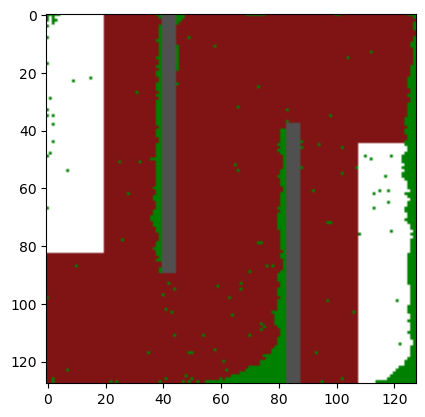

In [13]:
plt.imshow(image_list[-1][-1])